# Generating Fashion Designs
Make Money with Machine Learning week 6 homework  
using [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset

## Required modules

In [0]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D
from tensorflow.keras.layers import Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt
import sys

## Image Settings

In [0]:
# Size of training and generated images
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

# dimension of random input vector to generator
latent_dim = 100 

## Generator

In [0]:
def build_generator(latent_dim, img_shape):

        model = Sequential()

        model.add(Dense(256, input_dim=latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(img_shape), activation='tanh'))
        model.add(Reshape(img_shape))

        print('Generator model summary')
        model.summary()

        noise = Input(shape=(latent_dim,))
        img = model(noise)

        return Model(noise, img)

## Discriminator

In [0]:
def build_discriminator(img_shape):

        model = Sequential()

        model.add(Flatten(input_shape=img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
       
        print('Discriminator model summary')
        model.summary()

        img = Input(shape=img_shape)
        validity = model(img)

        return Model(img, validity)

## Generative Adversarial Network (GAN)
Combine the generator and discriminator models

In [36]:
# Build generator
generator = build_generator(latent_dim, img_shape)

Generator model summary
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_22 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_23 (Dense)             (

In [37]:
# Build and compile discriminator
optimizer = Adam(0.0002, 0.5)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

Discriminator model summary
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
____________________

In [0]:
# Generator takes noise as input and generate images
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

# The combined model gan (stacked generator and discriminator)
# Trains the generator to fool the discriminator
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)


## The function that generate images after training the GAN

In [0]:
def generate_images(nrows=1, ncols=5, save_fig=False):
        noise = np.random.normal(0, 1, (nrows * ncols, latent_dim))
        gen_imgs = generator.predict(noise)
        # Rescale image pixels to the range from 0 to 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(nrows, ncols)
        cnt = 0
        if nrows == 1 and ncols == 1:
            axs.imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs.axis('off')
        elif nrows == 1:
            for j in range(ncols):
                axs[j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[j].axis('off')
                cnt += 1
        elif ncols == 1:
            for i in range(nrows):
                axs[i].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i].axis('off')
                cnt += 1
        else:
            for i in range(nrows):
                for j in range(ncols):
                    axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                    axs[i,j].axis('off')
                    cnt += 1
        
        if save_fig:
            fig.savefig("gen_img.png")
        
        plt.show()
        plt.close()

## Train the GAN model

epoch: 0 [D loss: 0.668149, acc.: 57.81%] [G loss: 0.572770]
Generated images


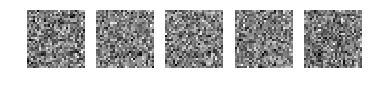

epoch: 200 [D loss: 0.206232, acc.: 93.75%] [G loss: 3.244022]
Generated images


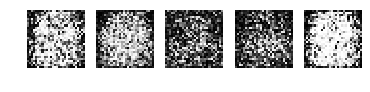

epoch: 400 [D loss: 0.584769, acc.: 73.44%] [G loss: 1.013792]
Generated images


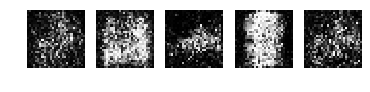

epoch: 600 [D loss: 0.653344, acc.: 54.69%] [G loss: 0.987368]
Generated images


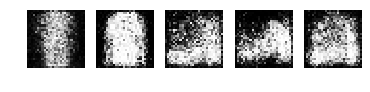

epoch: 800 [D loss: 0.666502, acc.: 60.94%] [G loss: 0.898566]
Generated images


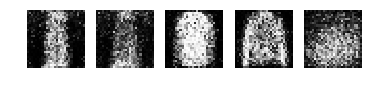

epoch: 1000 [D loss: 0.695877, acc.: 64.06%] [G loss: 0.879207]
Generated images


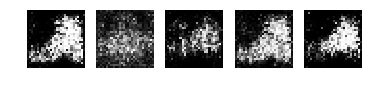

epoch: 1200 [D loss: 0.648161, acc.: 57.81%] [G loss: 0.803184]
Generated images


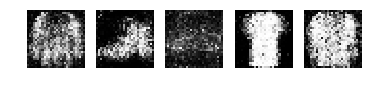

epoch: 1400 [D loss: 0.710580, acc.: 46.88%] [G loss: 0.885812]
Generated images


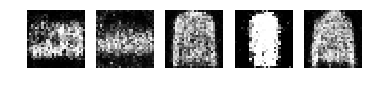

epoch: 1600 [D loss: 0.713449, acc.: 57.81%] [G loss: 0.895338]
Generated images


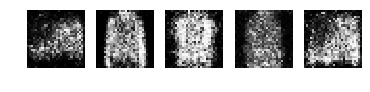

epoch: 1800 [D loss: 0.603418, acc.: 62.50%] [G loss: 0.877380]
Generated images


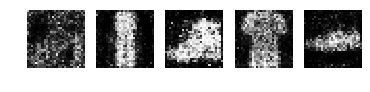

epoch: 2000 [D loss: 0.702379, acc.: 53.12%] [G loss: 0.940479]
Generated images


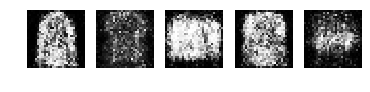

epoch: 2200 [D loss: 0.584427, acc.: 78.12%] [G loss: 0.838798]
Generated images


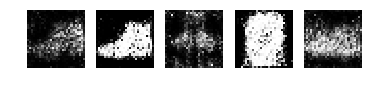

epoch: 2400 [D loss: 0.629278, acc.: 60.94%] [G loss: 0.979664]
Generated images


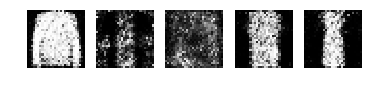

epoch: 2600 [D loss: 0.598374, acc.: 71.88%] [G loss: 0.843759]
Generated images


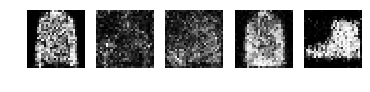

epoch: 2800 [D loss: 0.565632, acc.: 65.62%] [G loss: 0.909785]
Generated images


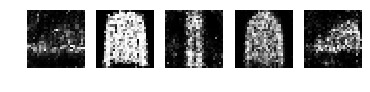

In [40]:
# Training settings
epochs=3000
batch_size=32
sample_interval=200

# Load the dataset
(X_train, _), (_, _) = fashion_mnist.load_data()

# Rescale pixel values to the range from -1 to 1
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random batch of images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate a batch of new images
    gen_imgs = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    g_loss = gan.train_on_batch(noise, valid)

    # Print the progress and
    # generate image samples at sample intervals
    if epoch % sample_interval == 0:
        print("epoch: %d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        print('Generated images')
        generate_images()

## Generated Images Example 1 

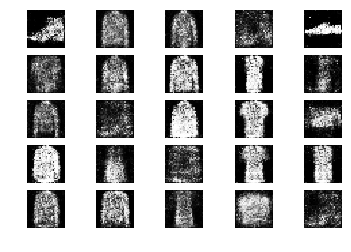

In [43]:
generate_images(5, 5)

## Generated Images Example 2

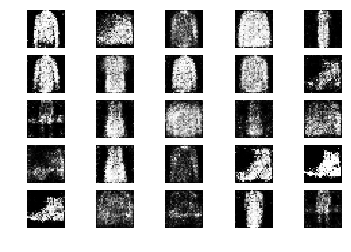

In [42]:
generate_images(5, 5)